In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data=pd.read_csv("multiple_linear_regression.csv")

In [2]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
x=data.loc[:,data.columns!="Target"]

In [4]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
y=data.loc[:,"Target"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


,Feature 1,Feature 2,Feature 3
142,220.5,33.2,37.9
125,87.2,11.8,25.9
101,296.4,36.3,100.9
131,265.2,2.9,43.0
19,147.3,23.9,19.1


In [12]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_
lr.intercept_

2.934527546321

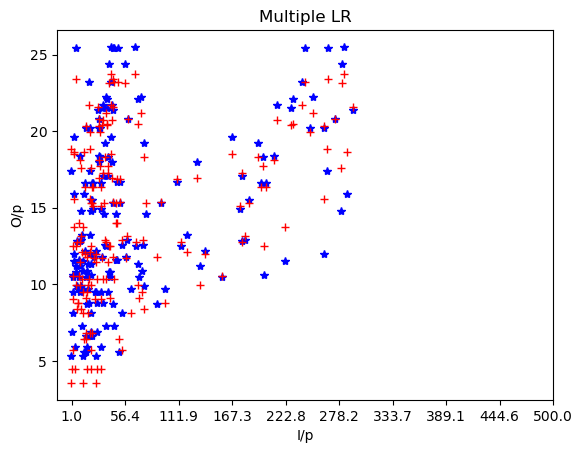

In [18]:
predict=lr.predict(x_test)
plt.plot(x_test,y_test,"*",color="blue")
plt.plot(x_test, predict, "+", color = "red")
plt.title("Multiple LR")
plt.xlabel("I/p")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("O/p")
plt.show()

# Assumption testing


###### ASSUMPTIOM 1-MODEL MUST BE UNBIASED

In [19]:
predict

array([16.33800902, 18.34587137, 12.88973428,  6.46017076,  8.81188337,
        9.97959368, 18.84341476, 12.7595286 , 17.26486854,  9.93741306,
       20.34765079, 18.47968109, 11.81498403, 20.41736829, 15.31094469,
       18.61780112, 16.89417232, 17.74559884, 14.00304434, 10.56549808,
       20.79833524, 13.71452052,  6.8063148 , 20.75301906, 21.58868771,
       15.13123522, 10.36459201,  4.44350553, 19.95172905,  9.01556981,
        8.13031552, 13.13866357,  8.41319699,  9.4770049 , 11.9523073 ,
       20.47215744, 10.35962332, 18.11517913, 21.17177735, 12.49121197,
       23.38983355, 23.71400016, 16.34491246, 11.4540406 , 23.17704747,
       21.70036056, 12.10789514, 12.76571022, 15.35727303, 23.2258452 ,
       12.51802296,  3.56715867,  5.72153198, 17.60667495, 15.57308438,
       16.95919393,  4.45946391,  9.11523725, 15.28912993, 11.7174264 ])

In [20]:
y_test

152    16.6
141    19.2
115    12.6
22      5.6
13      9.7
90     11.2
33     17.4
16     12.5
41     17.1
18     11.3
54     20.2
193    19.6
75      8.7
39     21.5
97     15.5
188    15.9
89     16.7
70     18.3
135    11.6
180    10.5
137    20.8
174    11.5
119     6.6
84     21.7
30     21.4
45     14.9
158     7.3
192     5.9
176    20.2
66      9.5
24      9.7
4      12.9
191     9.9
140    10.9
116    12.2
0      22.1
72      8.8
59     18.4
93     22.2
190    10.8
36     25.4
198    25.5
40     16.6
136     9.5
17     24.4
47     23.2
7      13.2
197    12.8
156    15.3
147    25.4
9      10.6
108     5.3
60      8.1
102    14.8
25     12.0
64     18.0
76      6.9
29     10.5
114    14.6
6      11.8
Name: Target, dtype: float64

In [22]:
residuals=predict-y_test
residuals

152   -0.261991
141   -0.854129
115    0.289734
22     0.860171
13    -0.888117
90    -1.220406
33     1.443415
16     0.259529
41     0.164869
18    -1.362587
54     0.147651
193   -1.120319
75     3.114984
39    -1.082632
97    -0.189055
188    2.717801
89     0.194172
70    -0.554401
135    2.403044
180    0.065498
137   -0.001665
174    2.214521
119    0.206315
84    -0.946981
30     0.188688
45     0.231235
158    3.064592
192   -1.456494
176   -0.248271
66    -0.484430
24    -1.569684
4      0.238664
191   -1.486803
140   -1.422995
116   -0.247693
0     -1.627843
72     1.559623
59    -0.284821
93    -1.028223
190    1.691212
36    -2.010166
198   -1.786000
40    -0.255088
136    1.954041
17    -1.222953
47    -1.499639
7     -1.092105
197   -0.034290
156    0.057273
147   -2.174155
9      1.918023
108   -1.732841
60    -2.378468
102    2.806675
25     3.573084
64    -1.040806
76    -2.440536
29    -1.384763
114    0.689130
6     -0.082574
Name: Target, dtype: float64

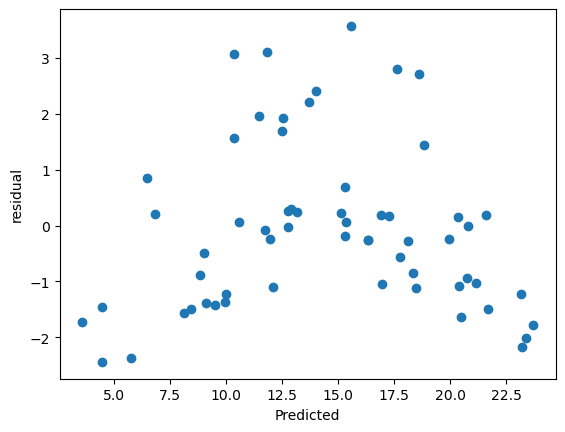

In [26]:
plt.scatter(predict,residuals)
plt.xlabel("Predicted")
plt.ylabel("residual")
plt.show()

###### Assumption 2 normality in residuals


C:\Users\tanta\AppData\Local\Temp\ipykernel_4580\1267434961.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(residuals)


<Axes: xlabel='Target', ylabel='Density'>

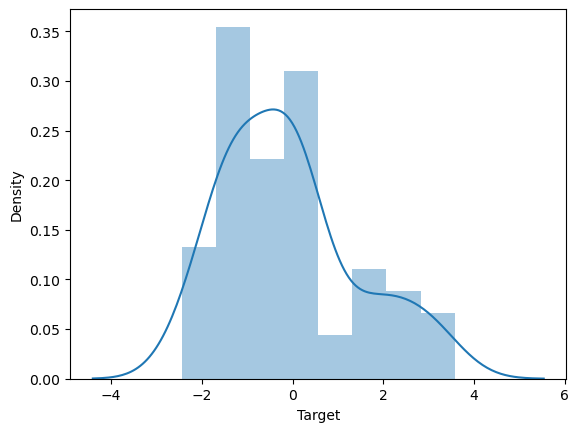

In [28]:
import seaborn as sn
sn.distplot(residuals)

# Ordinary Least Square

In [29]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
142,1.0,220.5,33.2,37.9
125,1.0,87.2,11.8,25.9
101,1.0,296.4,36.3,100.9
131,1.0,265.2,2.9,43.0
19,1.0,147.3,23.9,19.1
...,...,...,...,...
154,1.0,187.8,21.1,9.5
173,1.0,168.4,7.1,12.8
111,1.0,241.7,38.0,23.2
168,1.0,215.4,23.6,57.6


In [31]:
model = sm.OLS(y_train, x_with_constant)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     336.0
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.13e-62
Time:                        21:04:37   Log-Likelihood:                -276.63
No. Observations:                 140   AIC:                             561.3
Df Residuals:                     136   BIC:                             573.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9345      0.398      7.369      0.000       2.147       3.722
Feature 1      0.0457      0.002     25.241      0.000       0.042       0.049
Feature 2      0.1888      0.011     17.444      0.000       0.167       0.210
Feature 3     -0.0016      0.008     -0.211      0.833      -0.017       0.014
==============================================================================
Omnibus:                       51.796   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.587
Skew:                          -1.466   Prob(JB):                     2.96e-31
Kurtosis:                       6.938   Cond. No.                         458.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
re